# **Topic Modeling using pyCaret**

In [ ]:
#!pip install pycaret

In [1]:
# Import packages
import pycaret
from pycaret.nlp import *
from pycaret.nlp import load_model

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

import spacy
spacy.load('en_core_web_sm')

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

## **Load The Dataset**

In [2]:
df=pd.read_table("Statistics.txt",error_bad_lines=False)
df.head()

,text
0,statistics is the discipline that concerns the...
1,"today, statistics is widely employed in govern..."
2,sampling theory is part of the mathematical d...
3,a statistic is a random variable that is a fun...
4,a critical region is the set of values of the ...


## **Setting up Environment in PyCaret(*using setup function*)**

In [3]:
text=setup(df,target='text')

Description,Value
session_id,8382
Documents,19
Vocab Size,2861
Custom Stopwords,False


In [4]:
#convert 'x' column of dataset into list format
text_list = list(df['text'])
type(text_list)

list

In [5]:
nlp_list = setup(data = text_list, session_id = 225)

Description,Value
session_id,225
Documents,19
Vocab Size,2861
Custom Stopwords,False


## **Wordcloud**

In [6]:
train_data=str(text_list)

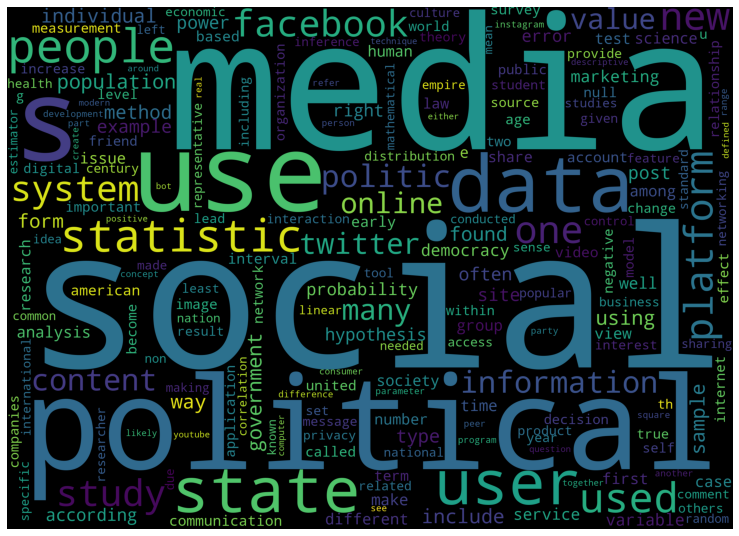

In [7]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('statistical')
stopwords.add('may')
plt.figure(figsize=(13,13))
#text = description_category.description.values
cloud = WordCloud(stopwords=STOPWORDS, background_color='black', collocations=False, width=2500, height=1800).generate(train_data)
plt.axis('off')
plt.imshow(cloud)

## **Create a Topic Model(LDA)**

In [6]:
lda = create_model('lda')
print(lda)

LdaModel(num_terms=2861, num_topics=4, decay=0.5, chunksize=100)


In [7]:
lda2 = create_model('lda', num_topics =5, multi_core = True)
print(lda2)

LdaModel(num_terms=2861, num_topics=5, decay=0.5, chunksize=100)


## **Assign a Model**

In [8]:
lda_results = assign_model(lda2)
lda_results

,en,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Dominant_Topic,Perc_Dominant_Topic
0,statistic datum apply statistic scientific ind...,0.000373,0.998513,0.000371,0.000370,0.000373,Topic 1,1.00
1,today statistic widely employ government busin...,0.000649,0.997409,0.000649,0.000648,0.000646,Topic 1,1.00
2,sample mathematical discipline probability the...,0.000343,0.998632,0.000342,0.000341,0.000341,Topic 1,1.00
3,statistic random variable function random samp...,0.000364,0.998544,0.000364,0.000363,0.000365,Topic 1,1.00
4,critical region set value estimator lead refut...,0.000507,0.997987,0.000504,0.000500,0.000502,Topic 1,1.00
5,comprise descriptive_statistics application in...,0.000830,0.996685,0.000835,0.000822,0.000827,Topic 1,1.00
6,statistic also heavily use management accounti...,0.001114,0.995563,0.001123,0.001096,0.001103,Topic 1,1.00
7,social medium interactive technology allow cre...,0.000289,0.000288,0.998851,0.000285,0.000287,Topic 2,1.00
8,mobile social medium useful application mobile...,0.000103,0.000102,0.999592,0.000101,0.000102,Topic 2,1.00
9,scientist use social medium share scientific k...,0.999619,0.000095,0.000096,0.000095,0.000095,Topic 0,1.00


## **Topics**

In [9]:
df1=lda_results.rename({'en':'Text','Topic_0': 'Researches','Topic_1':'Statistic','Topic_2':'Social_medium','Topic_3':'Politic','Topic_4':'Democracy'}, axis=1)
df1

,Text,Researches,Statistic,Social_medium,Politic,Democracy,Dominant_Topic,Perc_Dominant_Topic
0,statistic datum apply statistic scientific ind...,0.000373,0.998513,0.000371,0.000370,0.000373,Topic 1,1.00
1,today statistic widely employ government busin...,0.000649,0.997409,0.000649,0.000648,0.000646,Topic 1,1.00
2,sample mathematical discipline probability the...,0.000343,0.998632,0.000342,0.000341,0.000341,Topic 1,1.00
3,statistic random variable function random samp...,0.000364,0.998544,0.000364,0.000363,0.000365,Topic 1,1.00
4,critical region set value estimator lead refut...,0.000507,0.997987,0.000504,0.000500,0.000502,Topic 1,1.00
5,comprise descriptive_statistics application in...,0.000830,0.996685,0.000835,0.000822,0.000827,Topic 1,1.00
6,statistic also heavily use management accounti...,0.001114,0.995563,0.001123,0.001096,0.001103,Topic 1,1.00
7,social medium interactive technology allow cre...,0.000289,0.000288,0.998851,0.000285,0.000287,Topic 2,1.00
8,mobile social medium useful application mobile...,0.000103,0.000102,0.999592,0.000101,0.000102,Topic 2,1.00
9,scientist use social medium share scientific k...,0.999619,0.000095,0.000096,0.000095,0.000095,Topic 0,1.00


In [10]:
data=df1.replace(('Topic 0','Topic 1','Topic 2','Topic 3','Topic 4'),('Researches','Statistic','Social_medium','Politic','Democracy'))
data.head(11)

,Text,Researches,Statistic,Social_medium,Politic,Democracy,Dominant_Topic,Perc_Dominant_Topic
0,statistic datum apply statistic scientific ind...,0.000373,0.998513,0.000371,0.000370,0.000373,Statistic,1.0
1,today statistic widely employ government busin...,0.000649,0.997409,0.000649,0.000648,0.000646,Statistic,1.0
2,sample mathematical discipline probability the...,0.000343,0.998632,0.000342,0.000341,0.000341,Statistic,1.0
3,statistic random variable function random samp...,0.000364,0.998544,0.000364,0.000363,0.000365,Statistic,1.0
4,critical region set value estimator lead refut...,0.000507,0.997987,0.000504,0.000500,0.000502,Statistic,1.0
5,comprise descriptive_statistics application in...,0.000830,0.996685,0.000835,0.000822,0.000827,Statistic,1.0
6,statistic also heavily use management accounti...,0.001114,0.995563,0.001123,0.001096,0.001103,Statistic,1.0
7,social medium interactive technology allow cre...,0.000289,0.000288,0.998851,0.000285,0.000287,Social_medium,1.0
8,mobile social medium useful application mobile...,0.000103,0.000102,0.999592,0.000101,0.000102,Social_medium,1.0
9,scientist use social medium share scientific k...,0.999619,0.000095,0.000096,0.000095,0.000095,Researches,1.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Text                 19 non-null     object 
 1   Researches           19 non-null     float64
 2   Statistic            19 non-null     float64
 3   Social_medium        19 non-null     float64
 4   Politic              19 non-null     float64
 5   Democracy            19 non-null     float64
 6   Dominant_Topic       19 non-null     object 
 7   Perc_Dominant_Topic  19 non-null     float64
dtypes: float64(6), object(2)
memory usage: 1.3+ KB


## **Plot a Model**

In [12]:
plot_model(plot='bigram')

In [13]:
plot_model(plot='trigram')

## **Frequency Distribution of Topic 1**

In [14]:
plot_model(lda2, plot = 'frequency', topic_num = 'Topic 1')

## **Topic Distribution**

In [15]:
plot_model(lda2, plot = 'topic_distribution')

## T-distributed Stochastic Neighbor Embedding (t-SNE)

In [16]:
plot_model(lda2, plot = 'tsne')

### **Uniform Manifold Approximation and Projection Plot**

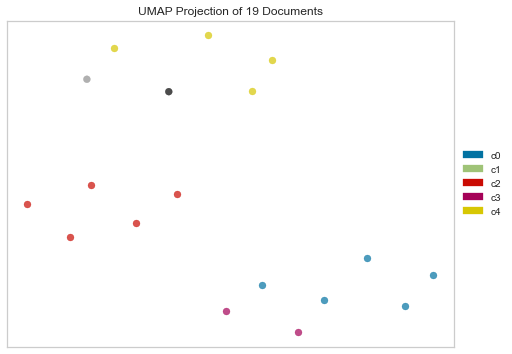

In [17]:
plot_model(lda2, plot = 'umap')

## **Evaluate Model**

In [18]:
evaluate_model(lda2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

## **Saving the model**

In [21]:
save_model(lda2,'Final LDA Model')

Model Succesfully Saved


(<gensim.models.ldamulticore.LdaMulticore at 0x1c50ffb5070>,
 'Final LDA Model.pkl')

## **Loading the model**

In [3]:
saved_lda = load_model('Final LDA Model')

Model Sucessfully Loaded


In [23]:
print(saved_lda)

LdaModel(num_terms=2861, num_topics=5, decay=0.5, chunksize=100)


## Model Building(classification)

In [19]:
from pycaret.classification import *

clf1 = setup(data = data, 
             target = 'Dominant_Topic',
             numeric_imputation = 'mean',session_id = 250,fold=4,ignore_features = ['Researches','Statistic','Social_medium','Politic','Democracy','Perc_Dominant_Topic'],silent = True)

compare_models()

In [20]:
clf = setup(data = data, 
             target = 'Dominant_Topic',
             numeric_imputation = 'mean',session_id = 784,fold= 4,silent = True)

,Description,Value
0,session_id,784
1,Target,Dominant_Topic
2,Target Type,Multiclass
3,Label Encoded,"Democracy: 0, Politic: 1, Researches: 2, Social_medium: 3, Statistic: 4"
4,Original Data,"(19, 8)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
#Compare the models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9375,0.1667,0.9375,0.9062,0.9167,0.9167,0.9326,0.0200
svm,SVM - Linear Kernel,0.9375,0.0000,0.9375,0.9062,0.9167,0.9167,0.9326,0.0200
ridge,Ridge Classifier,0.9375,0.0000,0.9375,0.9062,0.9167,0.9167,0.9326,0.0325
gbc,Gradient Boosting Classifier,0.9375,0.1667,0.9375,0.9062,0.9167,0.9167,0.9326,0.1925
lda,Linear Discriminant Analysis,0.9375,0.1562,0.9000,0.9375,0.9375,0.9231,0.9375,0.0175
et,Extra Trees Classifier,0.9375,0.1458,0.9375,0.9062,0.9167,0.9167,0.9326,0.1475
xgboost,Extreme Gradient Boosting,0.8542,0.1667,0.8125,0.8229,0.8333,0.8095,0.8492,0.1725
rf,Random Forest Classifier,0.7708,0.1667,0.7292,0.6979,0.7222,0.6845,0.7523,0.1575
ada,Ada Boost Classifier,0.7708,0.1667,0.7708,0.6562,0.6944,0.6667,0.7388,0.0750
lr,Logistic Regression,0.6250,0.1875,0.6250,0.4583,0.5104,0.4583,0.5771,2.4750


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=784, splitter='best')

In [22]:
#create model
lda= create_model('lda') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7500,0.6250,0.6000,0.7500,0.7500,0.6923,0.7500
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9375,0.1562,0.9000,0.9375,0.9375,0.9231,0.9375
SD,0.1083,0.2706,0.1732,0.1083,0.1083,0.1332,0.1083


In [25]:
#tunning
tuned_lda= tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7500,0.8333,0.7500,0.6250,0.6667,0.6667,0.7303
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9375,0.2083,0.9375,0.9062,0.9167,0.9167,0.9326
SD,0.1083,0.3608,0.1083,0.1624,0.1443,0.1443,0.1168


In [26]:
pred_model = predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,1.0000,0,1.0000,1.0000,1.0000,1.0000,1.0000


In [27]:
final_model= finalize_model(tuned_lda)
final_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.001,
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [39]:
#interpret_model(tuned_et)

## Blending

In [ ]:
#top3 = compare_models(n_select = 3)
#blender = blend_models(top3)

In [29]:
dt = create_model('et');      
gbc  = create_model('gbc');            

#blending 3 models
blend = blend_models(estimator_list=[tuned_lda,dt,gbc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7500,0.6667,0.7500,0.6250,0.6667,0.6667,0.7303
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9375,0.1667,0.9375,0.9062,0.9167,0.9167,0.9326
SD,0.1083,0.2887,0.1083,0.1624,0.1443,0.1443,0.1168


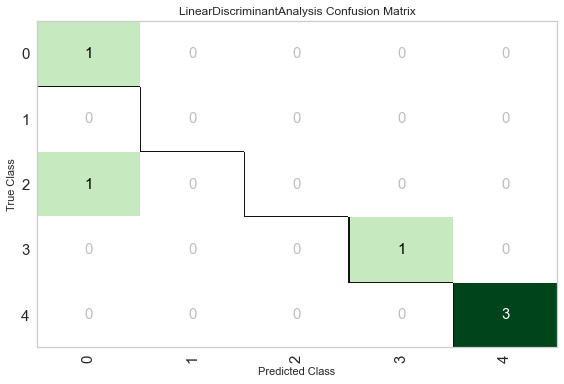

In [35]:
plot_model(estimator = tuned_lda, plot = 'confusion_matrix')

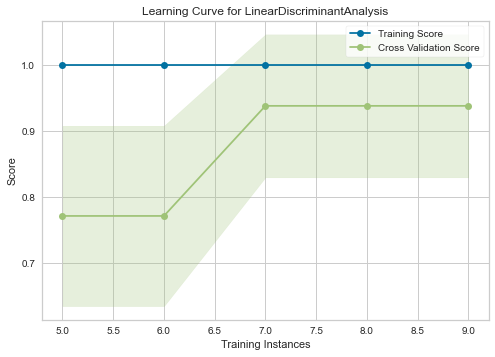

In [36]:
plot_model(estimator = tuned_lda, plot = 'learning')


## Evaluate Model

In [37]:
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Save The Model

In [61]:
save_model(tuned_et,'Final_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Dominant_Topic',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight='balanced',
                                       criterion='entropy', max_depth=8,
                           

## Load The Model

In [62]:
saved_lda = load_model('Final_Model')

Transformation Pipeline and Model Successfully Loaded


 ## Deploy Model

In [65]:

import os
os.environ["AZURE_STORAGE_CONNECTION_STRING"] = str("bar")
deploy_model(model = tuned_et, model_name = 'et-deployment', platform = 'azure', authentication = {'container': 'azure-container-name'})

ImportError: azure-storage-blob library not found. pip install azure-storage-blob to use deploy_model function with Azure.